This notebook demonstrates the estimation of markov logic networks given the respective formulas. Based on a list of formulas and samples the respective weights can be estimated and a markov logic network created.

# Installation


In [44]:
!pip install tnreason

# Generate Test Data



In [45]:
formulaList = [
    "a1",
    ["a1","and","a2"],
    ["not",["a1","and",["not","a3"]]]
]

In [46]:
import numpy as np

maxWeight = 2
expressionsDict = {
    "f"+str(i) : [formula, maxWeight * np.random.rand()] for i, formula in enumerate(formulaList)
}

In [47]:
from tnreason.model import generate_test_data as gtd

sampleNum = 100
sampleDf = gtd.generate_sampleDf(expressionsDict, sampleNum)

/usr/local/lib/python3.10/dist-packages/tnreason/model/sampling.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if updateAtomKey not in miniSampler.atoms:
/usr/local/lib/python3.10/dist-packages/tnreason/model/sampling.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if updateAtomKey not in miniSampler.atoms:
/usr/local/lib/python3.10/dist-packages/tnreason/model/sampling.py:51: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  sampleDf = pd.concat(
/usr/local/lib/python3.10/dist-packages/tnreason/model/sampling.py:61: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if updateAtomKey not in miniSampler.atoms:
/usr/l

# Optimize Weights

In [31]:
from tnreason.optimization import weight_estimation as wees

In [32]:
estimator = wees.WeightEstimator(formulaList, sampleDf=sampleDf)

In [33]:
estimator.alternating_optimization(sweepNum = 10)

Setting to truthEvaluation
Setting to expFactor


array([[2.31363493, 2.30692349, 0.35139789],
       [0.76528471, 1.94653315, 1.24098667],
       [1.36599921, 1.79144274, 1.3138847 ],
       [1.5162396 , 1.73429325, 1.32623977],
       [1.56762447, 1.71462759, 1.33021746],
       [1.58514788, 1.70803005, 1.33155779],
       [1.59101619, 1.70583595, 1.33200506],
       [1.59296678, 1.70510842, 1.33215356],
       [1.59361346, 1.70486741, 1.33220277],
       [1.59382767, 1.7047876 , 1.33221907],
       [1.59389861, 1.70476117, 1.33222447]])

In [37]:
estimatedWeights = estimator.get_weights()

Compare with weights used in the data generation:

In [35]:
expressionsDict

{'f0': ['a1', 1.4584768315718015],
 'f1': [['a1', 'and', 'a2'], 1.9399161961813003],
 'f2': [['not', ['a1', 'and', ['not', 'a3']]], 1.0870506679812966]}

# Build a Markov Logic Network

In [38]:
estimatedExpressionsDict = {
    "f"+str(i) : [formula, estimatedWeights["f"+str(i)]] for i, formula in enumerate(formulaList)
}

In [39]:
from tnreason.model import tensor_model as tm

In [42]:
tRep = tm.TensorRepresentation(estimatedExpressionsDict)

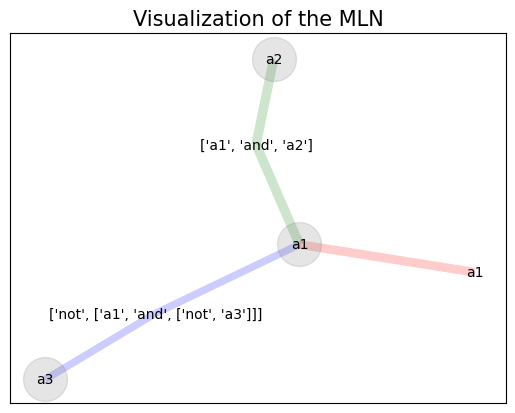

{'a1': array([ 0.14499296, -0.05015468]),
 'a2': array([0.06817252, 1.        ]),
 'a3': array([-0.61192458, -0.8164971 ]),
 'f0': array([ 0.66708375, -0.20795118]),
 'f1': array([0.01603737, 0.51679467]),
 'f2': array([-0.28436202, -0.44219172])}

In [43]:
tRep.visualize()